# Content Based Filtering

This recommendation system suggests items similar to those the user has previously liked. It calculates similarity based on the content of the movie like genres, overview, cast, and director. In this notebook, we demonstrate content-based filtering on [TMDB 5000 Movie](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), where we perform various pre-processing steps on the dataset using NLTK library and computing cosine similarity.\
Let's begin!

In [51]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#loading the dataset. The dataset consists of 5000 movies from TMDB.
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

Let's have a look at our datasets and their statistics.

In [53]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [55]:
movies.shape

(4803, 20)

In [56]:
credits.shape

(4803, 4)

Since we need information from both the datasets, let's merge the dataset on the "Title" column.

In [57]:
#Merging both the datasets
data = movies.merge(credits, on="title")

In [58]:
data.shape

(4809, 23)

The shape of the merged dataset is (4809, 23) which is correct by the dimensions of the movies and credits dataset.

In [59]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

Our dataset consists of a lot of features but not all features are useful for prediction. We will remove all the unrelevant information from our dataset. We will keep only such features which conveys information about the user preferences like genres, keywords, overview, cast, crew. We would also need id and original_title for recommendation purposes.

In [60]:
#Keeping only columns we need for predictions
data = data[['id','original_title','genres','keywords','overview','cast','crew']]

In [61]:
#Our final dataset
data.head()

,id,original_title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Data Preprocessing

Data Preprocessing is an important step to enhance model predictions. This is essential for removing unnecessary noise from the data.

In [62]:
#Checking for null values
data.isnull().sum()

id                0
original_title    0
genres            0
keywords          0
overview          3
cast              0
crew              0
dtype: int64

In [63]:
#Dropping the null values
data.dropna(inplace=True)

In [64]:
data.isnull().sum()

id                0
original_title    0
genres            0
keywords          0
overview          0
cast              0
crew              0
dtype: int64

In [65]:
#Checking for duplicated values
data.duplicated().sum()

0

In [66]:
data.head(1)

,id,original_title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


For model building, we will be creating **tags** that are **a combination of genres, keywords, overview, top 3 cast and director.** \
We need to now extract the required features from the dataset.

In [67]:
data.head(1)['genres'].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'],
      dtype=object)

We need to extract only the genre "name" from the array. Also notice that the datatype is object and hence we need to convert this into a list first and then extract the names.

In [68]:
#Using the literal_eval function from the ast library to convert a string to a list.
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

We will now be creating a **convert** function that takes an object as an input and returns a list of genre names.

In [69]:
def convert(obj):
    list_of_genres = []
    for i in ast.literal_eval(obj):
        list_of_genres.append(i['name'])
    return list_of_genres

Applying the convert function to genres and keywords.

In [70]:
data['genres'] = data['genres'].apply(convert)

In [71]:
data.head(1)['genres'].values

array([list(['Action', 'Adventure', 'Fantasy', 'Science Fiction'])],
      dtype=object)

In [72]:
data.head(1)['keywords'].values

array(['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'],
      dtype=object)

In [73]:
data['keywords'] = data['keywords'].apply(convert)

In [74]:
data.head(1)['keywords'].values

array([list(['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d'])],
      dtype=object)

To extract the top 3 cast and director from the cast and crew column, we define similar functions

In [75]:
def convertCast(obj):
    actors = []
    for i in ast.literal_eval(obj):
        actors.append(i['name'])
        actors = actors[0:3]
    return actors

In [76]:
data['cast'] = data['cast'].apply(convertCast)

In [77]:
def convertCrew(obj):
    director = []
    crew = ast.literal_eval(obj)
    for i in crew:
        if i['job']=='Director':
            director.append(i['name'])
    return director

In [78]:
data['director'] = data['crew'].apply(convertCrew)

In [79]:
#We don't need the crew column now
data.drop(['crew'],axis=1,inplace=True)

In [80]:
data['overview'].head(1)

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [81]:
#Splitting the overview to a list of strings.
data['overview'] = data['overview'].apply(lambda x: x.split())

In [82]:
data['overview'].head(1)

0    [In, the, 22nd, century,, a, paraplegic, Marin...
Name: overview, dtype: object

It is important to remove the spaces. Consider the following 2 names of the directors as James Cameron and James Cruze. Both the names will belong to one sinle entity hence to treat them as one, we would need to remove the spaces.

In [83]:
def removeSpaces(obj):
    L = []
    for i in obj:
        L.append(i.replace(" ",""))
    return L

In [84]:
data['cast'] = data['cast'].apply(removeSpaces)
data['genres'] = data['genres'].apply(removeSpaces)
data['keywords'] = data['keywords'].apply(removeSpaces)
data['director'] = data['director'].apply(removeSpaces)

In [86]:
#Now we will create a tag column
data['tags'] = data['overview'] + data['genres'] +data['keywords'] + data['cast'] + data['director']

In [88]:
df = data[['id','original_title','tags']]

In [89]:
df.head()

,id,original_title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [90]:
#Converting to string
df.loc[:, 'tags'] = df['tags'].apply(lambda x: " ".join(x))

In [91]:
#Converting to lowercase
df.loc[:, 'tags'] = df['tags'].apply(lambda x: x.lower())

In [92]:
df.tags[0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

The next processing step would be **stemming** to bring each word to it's native form. This is important so that we don't overfit our model.\
We will be using PorterStemmer to do the job.

In [93]:
from nltk.stem import PorterStemmer

In [96]:
ps = PorterStemmer()

In [97]:
#Now let's implement it here on our data.
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [98]:
df['tags'] = df['tags'].apply(stem)

C:\Users\ishas\AppData\Local\Temp\ipykernel_12452\866399325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(stem)


# Creating a vector space

Next step would be create a vector space of all the tags. We will be using the CountVectorizer() function to do so.

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [100]:
vectors = cv.fit_transform(df['tags']).toarray()

In [101]:
sorted(cv.vocabulary_)

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

Next step would be calculating the cosine distance. We will then use these distance to find the nearest 5 vectors.

In [102]:
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
similarity = cosine_similarity(vectors)

In [104]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

# Recommender function

Finally, we define the recommender function. The function finds the index of the movie based on which recommendations are given. Then it calculates the similarity matrix of that movie and returns a list of 5 movies that are most similar to the input movie.

In [105]:
def recommend(movie):
    movie_index = df[df['original_title']== movie].index[0]
    movie_distances = similarity[movie_index]
    recommended_list = sorted(list(enumerate(movie_distances)),reverse=True,key=lambda x:x[1])[1:6]
    for movies in recommended_list:
        print(df.iloc[movies[0]]['original_title'])

**Let's recommend!**

In [106]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [107]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Returns
Batman
Batman Forever
Batman Begins


Hence, we can conclude that the recommendation function did a really good job. For eg, the recommendations for the movie "The Dark Knight Rises" revolves around similar notions (All marvel movies!)

Here we are done with model building. Now we will build a website for our model.

In [108]:
import pickle

In [109]:
pickle.dump(df.to_dict(),open('movie_dict.pkl','wb'))

In [110]:
pickle.dump(similarity,open('similarity.pkl','wb'))

# Popular 5 movies based on vote rating

In [112]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [113]:
movies['genres'] = movies['genres'].apply(convert)

In [114]:
movies = movies[['id','original_title','genres','vote_count','vote_average']]

In [115]:
movies = movies[movies['vote_count']>500]

In [116]:
movies

,id,original_title,genres,vote_count,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",11800,7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",4500,6.9
2,206647,Spectre,"[Action, Adventure, Crime]",4466,6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",9106,7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]",2124,6.1
...,...,...,...,...,...
4738,473,Pi,"[Mystery, Drama, Thriller]",586,7.1
4742,9372,Super Size Me,"[Documentary, Comedy, Drama]",506,6.6
4758,242095,The Signal,"[Thriller, Science Fiction]",631,5.8
4773,2292,Clerks,[Comedy],755,7.4


In [117]:
#top 10 movies currently
popular5 = movies.sort_values('vote_average',ascending=False).head(5)

Text(0.5, 1.0, 'Popular Movies')

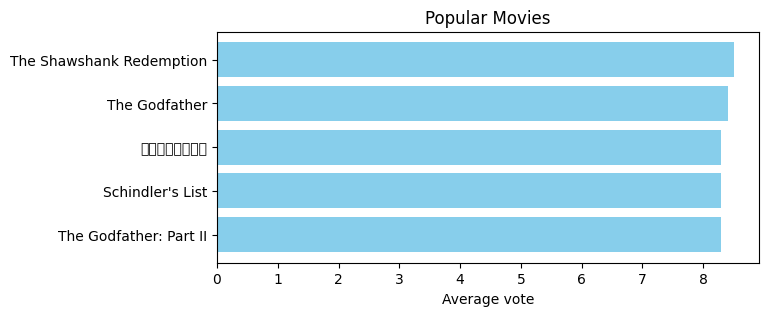

In [128]:
fig = plt.figure(figsize=(7,3))
plt.barh(popular5['original_title'],popular5['vote_average'],align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Average vote")
plt.title("Popular Movies")

In [118]:
popular5

,id,original_title,genres,vote_count,vote_average
1881,278,The Shawshank Redemption,"[Drama, Crime]",8205,8.5
3337,238,The Godfather,"[Drama, Crime]",5893,8.4
2294,129,千と千尋の神隠し,"[Fantasy, Adventure, Animation, Family]",3840,8.3
1818,424,Schindler's List,"[Drama, History, War]",4329,8.3
2731,240,The Godfather: Part II,"[Drama, Crime]",3338,8.3


In [119]:
titles = popular5['original_title'].values
for i in titles:
    print(i)

The Shawshank Redemption
The Godfather
千と千尋の神隠し
Schindler's List
The Godfather: Part II


In [120]:
pickle.dump(popular5,open('popular.pkl','wb'))